# SVM in Python 

by [*Kardi Teknomo*](http://people.revoledu.com/kardi/tutorial/)

last update: June 2017

This is a practice/laboratory session of SVM tutorial using Python. At the end of this tutorial you will learn the following:
* How to train Support Vector Machine using your data
* How to measure the performance of your training
* How to predict the label of classification using the data that is not in the training data
* To understand the role of kernel and cost parameter in improving the SVM performance
* To understand the meaning of support vector
* How to identify overfitting in SVM

The topics are

1. <a href='#linearlySeparable'>SVM for Linearly Separable Dataset</a>
2. <a href='#linearlyNonSeparable'>SVM for Non-Linearly Separable Dataset</a>
3. <a href='#oneDimensionSVM'>SVM for One Dimensional Dataset</a>

Let us start. First, you need to import the necessary modules.

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

# <a id='linearlySeparable'></a>

# 1. SVM for Linearly Separable Dataset

Our first dataset can be uploaded. Put the CSV files in the same folder as the Jupyter notebook.

## Data

In [2]:
filedata='SVM_Dataset1.csv'
data1=pd.read_csv(filedata)
data1

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


We separate the X training data from the y training data

In [3]:
X1=data1['X1']
X2=data1['X2']
X_training=np.array(list(zip(X1,X2)))
X_training

array([[ 2.94781377,  6.62687769],
       [ 2.53038797,  7.78505017],
       [ 3.56699086,  5.65104618],
       [ 3.15698302,  5.46707714],
       [ 2.5823456 ,  4.45777706],
       [ 2.15582583,  6.22234306],
       [ 3.27341837,  3.52068678]])

In [4]:
y_training=data1['y']
y_training

0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
Name: y, dtype: int64

In [5]:
target_names=['-1','+1']
target_names

['-1', '+1']

Let us plot this data. Can you imagine a line separating the two classes?

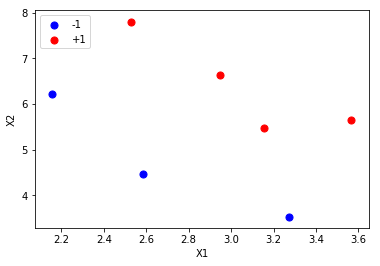

In [6]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('chart0.png')

## SVM Training

To use Vector Support Classification (SVC) algorithm, we need define the model **kernel**. Let us use  *linear kernel*. Then, we use the **fit()** function to train the model with our training data. 


In [7]:
svc = svm.SVC(kernel='linear').fit(X_training,y_training)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

To view the internal model parameters use **`get_params()`** method. 

In [8]:
svc.get_params(True)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The trained model can be plotted with specifying the **`decision_function()`** method.

First, we set the boundary of the plot.

In [9]:
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

[1, 5, 2, 9]

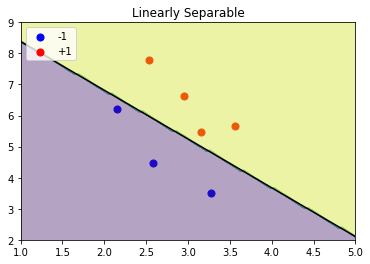

In [10]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Linearly Separable')
plt.savefig('chart1.png')

The following plot show the margin and the support vectors

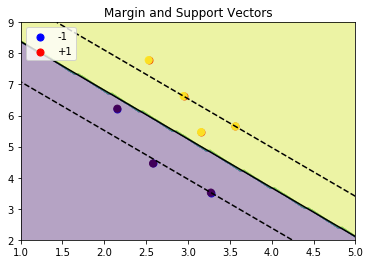

In [11]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Margin and Support Vectors')
plt.savefig('chart2.png')

## Support Vectors

The number of support vectors for each class can be revealed using **`n_support_'** attribute

In [12]:
svc.n_support_

array([2, 2], dtype=int32)

To get the indices (= the row numbers in the original dataset) of the support vectors, use **`support_`** attribute

In [13]:
svc.support_ 

array([5, 6, 2, 3], dtype=int32)

To identify the support vector, use **`support_vectors_`** attribute. The data that become the support vector are

In [14]:
svc.support_vectors_

array([[ 2.15582583,  6.22234306],
       [ 3.27341837,  3.52068678],
       [ 3.56699086,  5.65104618],
       [ 3.15698302,  5.46707714]])

For linear model, we can reveal the discriminant line that separate the classes using **`coef_`** and **`intercept_`** attributes.

In [15]:
weight=svc.coef_
intercept=svc.intercept_
a = -weight[0,0] / weight[0,1]
print('x2=',a,' * x1 + ',-intercept[0]/weight[0,1])

x2= -1.56974400473  * x1 +  9.95471289471


## Training Performances

To get the normalize accuracy, of the training, we can use **score(X,y)** function.

In [16]:
svc.score(X_training, y_training)

1.0

Alternatively, if you have test sample, you can also use the metric from sklearn. To use this on the training sample, we first need to define the y-prediction (which is based on the prediction of the model with X comes from the training sample) and the y-true value (which is based on the y of the training sample).

In [17]:
y_pred=svc.predict(X_training)
y_pred

array([ 1,  1,  1,  1, -1, -1, -1])

In [18]:
y_true = y_training
y_true

0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
Name: y, dtype: int64

The absolute accuracy is measured as follow.

In [19]:
metric.accuracy_score(y_true, y_pred, normalize=False)

7

Confusion matrix is useful to see if there is misclassification. If there is no missclassification, then the corect values would be in the diagonal.

In [20]:
cnf_matrix=metric.confusion_matrix(y_true, y_pred)
cnf_matrix

array([[3, 0],
       [0, 4]])

We can also visualize the confusion matrix through the following function

Confusion matrix, without normalization
[[3 0]
 [0 4]]


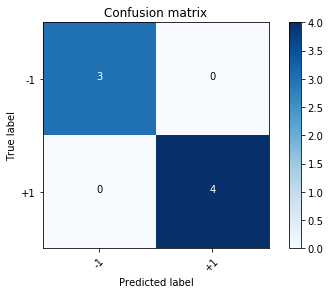

In [21]:
import itertools

# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

### SVM Prediction

Now we can also use the trained SVM to predict something that is outside the training data. Let us predict the class y of the given test data [X1, X2] = [3, 6]

In [22]:
svc.predict([[3,6]])

array([1])

The test data is now plotted.

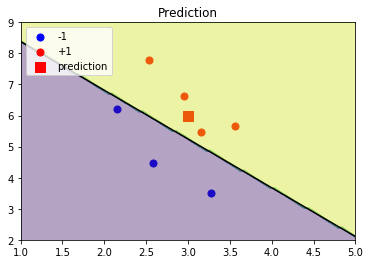

In [23]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.scatter(3,6,c='r',marker='s',s=90)
plt.legend(['-1','+1','prediction'],loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Prediction')
plt.savefig('chart3.png')

Optionally (in case you have limited memory in our laptop), if you want to clear the memory for the next training data, you can delete the variables with large memory.

In [24]:
del X1, X2, X_training, y_training

# <a id='linearlyNonSeparable'></a>

# 2. SVM for Non Linearly Separable Dataset

## Data
Now we upload the second dataset.

In [25]:
filedata='SVM_Dataset2.csv'
data2=pd.read_csv(filedata)
data2

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1
5,13.0,14,-1
6,14.0,12,-1
7,15.0,14,-1
8,15.0,17,-1
9,16.0,16,-1


We separate the X training data from the y training data

In [26]:
X1=data2['x1']
X2=data2['x2']
X_training=np.array(list(zip(X1,X2)))
X_training

array([[  7. ,  20. ],
       [  8. ,  12. ],
       [  9. ,  19. ],
       [ 10. ,  17. ],
       [ 11. ,  15. ],
       [ 13. ,  14. ],
       [ 14. ,  12. ],
       [ 15. ,  14. ],
       [ 15. ,  17. ],
       [ 16. ,  16. ],
       [  4. ,  15. ],
       [  5.5,  12. ],
       [  7. ,  10. ],
       [  8. ,  10. ],
       [  9. ,   9. ],
       [ 10. ,   8. ],
       [ 11. ,   5. ],
       [ 12. ,   7. ],
       [ 12. ,   9. ],
       [ 13. ,  10. ]])

In [27]:
y_training=data2['y']
y_training

0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: y, dtype: int64

Let us plot this data. Can you imagine a line separating the two classes?

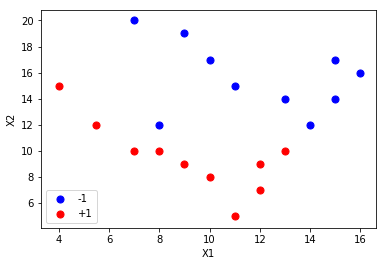

In [28]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('nl-chart0.png')

## Training

Since the plot show that no line can separate the two classes. If we still want to use linear kernel, we can define a regularization cost parameter **C**. We use the **fit()** function to train the model with our training data. Feel free to change the regularization parameter to make such that the error of classification would be minimum.

In [29]:
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

[3, 17, 4, 21]

0.90000000000000002

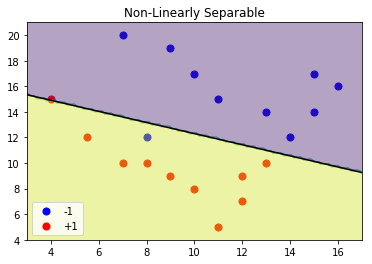

In [30]:
svc = svm.SVC(kernel='linear',C=0.001).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])
plt.title('Non-Linearly Separable')
plt.savefig('nl-chart1.png')

svc.score(X_training,y_training)

Now we increase the regularization parameter C=100.

0.94999999999999996

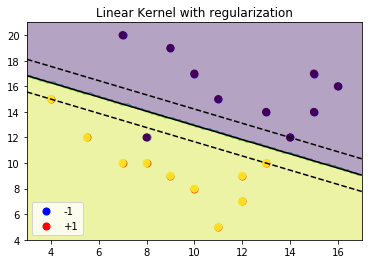

In [31]:
svc = svm.SVC(kernel='linear',C=100).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Linear Kernel with regularization')
plt.savefig('nl-chart-regularization.png')

svc.score(X_training,y_training)

## Support Vectors

The number of support vectors for each class

In [32]:
svc.n_support_

array([2, 2], dtype=int32)

In [33]:
svc.support_vectors_

array([[  8.,  12.],
       [ 14.,  12.],
       [  4.,  15.],
       [ 13.,  10.]])

## Training Performance


In [34]:
svc.score(X_training,y_training)

0.94999999999999996

In [35]:
y_pred=svc.predict(X_training)
y_true = y_training
metric.accuracy_score(y_true, y_pred, normalize=False)

19

Using linear kernel, we found 4 support vectors but one out of 20 data is in the wrong side. Thus the accuracy is 19 / 20 * 100 = 94.99%.

It seems we are stuck with one misclassification.


## Training with Polynomial Kernel

Now it is the time to change the kernel into non-linear kernel. Let us try to use polynomial kernel.

There is no misclassification if the degree = 2 and above.

You can play with the degree and regularization parameter C.
+ Will the number support vectors increase if you increase the degree?
+ Will the number support vectors increase if you increase the regularization parameter?


1.0

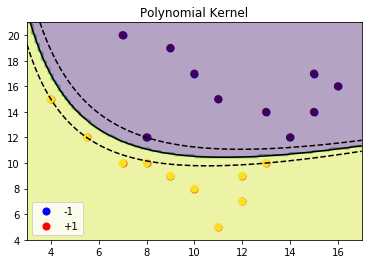

In [36]:
svc = svm.SVC(kernel='poly',C=1, degree=2, probability=True).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)

plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Polynomial Kernel')
plt.savefig('nl-poly2-kernel.png')

svc.score(X_training,y_training)

## Support Vector

Note that some of the support vectors are not the same point as the earlier support vectors using linear kernel.

In [37]:
svc.support_vectors_

array([[  8. ,  12. ],
       [  4. ,  15. ],
       [  5.5,  12. ],
       [ 13. ,  10. ]])

## Overfitting

Just to give rough idea of overfitting, now let us use RBF kernel.


1.0

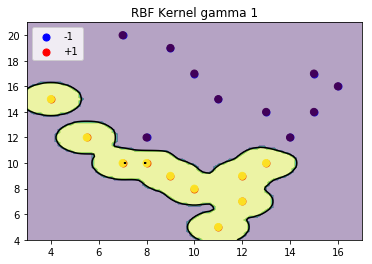

In [38]:
svc = svm.SVC(kernel='rbf',C=1, gamma=3).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(['-1','+1'],loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)

plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('RBF Kernel gamma 1')
plt.savefig('nl-RBF1-kernel.png')

svc.score(X_training,y_training)

In [39]:
y_pred=svc.predict(X_training)
y_true = y_training
metric.accuracy_score(y_true, y_pred, normalize=False)

20

In [40]:
svc.n_support_

array([10, 10], dtype=int32)

The accuracy of the training has reached 100% (20/20) due to the RBF kernel. However, look at the support vectors. The whole dataset becomes the support vectors and it is an indication that the RBF model overfit our data. Adding more data may need to change the model.

Thus, in our example the Polynomial model with lower degree (degree 2) works better.

## Support Vector as Quality Data

To show that Support Vector are actually quality data. We turn back to Polynomial Kernel degree 2.

In [41]:
svc = svm.SVC(kernel='poly',C=1, degree=2, probability=True).fit(X_training,y_training)
svc.score(X_training,y_training)

1.0

In [42]:
svc.n_support_

array([1, 3], dtype=int32)

In [43]:
X_training=svc.support_vectors_
X_training

array([[  8. ,  12. ],
       [  4. ,  15. ],
       [  5.5,  12. ],
       [ 13. ,  10. ]])

In [44]:
idx=svc.support_ 
y_training=list(y_training[idx])
y_training

[-1, 1, 1, 1]

In [45]:
svc = svm.SVC(kernel='poly',C=1, degree=2, probability=True).fit(X_training,y_training)
svc.score(X_training,y_training)

1.0

In [46]:
y_training
X_training
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(['-1','+1'],loc=2)
X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);
plt.title('Support Vectors as Quality Data')
plt.savefig('qualityData1.png')

TypeError: '<' not supported between instances of 'list' and 'int'

# <a id='oneDimensionSVM'></a>

# 3. One Dimensional SVM

This problem at first may seem to be simpler problem. We have X in one dimension. However, the challenge is the scatter plot does not accept 1D training data.

## Data

In [ ]:
filedata='SVM_Dataset3.csv'
data3=pd.read_csv(filedata)
data3

The actual X data is just one dimension. The scatter plot will not work.

To make it works, we need to add dummy X2 such that we can plot using scatter plot and train using SVM.

In [ ]:
X1=data3['x']
X2=np.ones((len(X),1),int)
X_training=np.array(list(zip(X1,X2)))  
# X_training=np.array(np.transpose([X1])) # alternative way, but you cannot plot

In [ ]:
y_training=data3['y']
y_training

In [ ]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('data3-chart0.png')

## SVM Training and Performance

Now let us do the SVM training to this dataset and plot

In [ ]:
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

In [ ]:
svc = svm.SVC(kernel='poly',C=1, degree=2).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)

plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Polynomial Kernel')
plt.savefig('data3-Poly-kernel.png')

svc.score(X_training,y_training)

This model has 9 support vectors.

In [ ]:
svc.n_support_

In [ ]:
svc = svm.SVC(kernel='poly',C=1, degree=3).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)

plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Polynomial Kernel')
plt.savefig('data3-Poly-kernel.png')

svc.score(X_training,y_training)

We have three support vector for Polynomial degree 3 and training accuracy of 100%. This should be the best model.

In [ ]:
svc.n_support_

## Overfitting

Just for curiosity, we can also try to use RBF kernel

In [ ]:
svc = svm.SVC(kernel='rbf',C=1, gamma=3).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)

plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('RBF Kernel')
plt.savefig('data3-RBF-kernel.png')

svc.score(X_training,y_training)

In [ ]:
svc.n_support_

Just as before, the accuracy is 100% but the whole data sets now become support vectors. It is a clear sign of overfitting. When the whole dataset become support vectors, it implies that the model memorizes the data rather than generalizing it. Thus, we should avoid to use RBF for this dataset.


# Conclusion

In conclusion, the support vectors in SVM are the quality data that we can use to generate the decision boundary (of the same model). Non-support vector data can be ignored, regardless how many data that you have. This also implies that SVM can overcome with ease the imbalance amount of data between classes. That is one of the strengths of SVM.

When the number of support vectors represent the whole dataset, the model is overfit because it memorize the whole dataset and cannot be generalized to predict new data outside the training set.

Check: [SVM Tutorial in Microsoft Excel](http://people.revoledu.com/kardi/tutorial/SVM/purchase.html)

Visit [www.Revoledu.com](http://people.revoledu.com/kardi/tutorial/) for more tutorials in Data Science

Copyright © 2017 [Kardi Teknomo](http://people.revoledu.com/kardi/)

Permission is granted to share this notebook as long as the copyright notice is intact.